In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm

In [2]:
save_plot = False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "deflection_along"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [3]:
data_along_track_01 = {
        'along_defl_stoch': None,
        'along_defl_cont': None,
        'along_defl_type': None,
        'along_defl_angle_stoch': None,
        'along_defl_angle_cont': None,   
    }

for key in tqdm(data_along_track_01.keys()):
    df_ = pd.read_hdf('data/data_along/data_along_deflection_along_01.hdf5', key='seed_3_{}'.format(key))
    data_along_track_01[key] = df_[df_.keys()[0]].to_numpy()
    df_01 = pd.read_hdf('data/data_along/data_along_deflection_along_01.hdf5', key='seed_3')    

100%|██████████| 5/5 [00:00<00:00,  8.55it/s]


In [4]:
np.sum(df_01.E_f == 1e3)

394

100%|██████████| 4/4 [00:00<00:00, 10.83it/s]


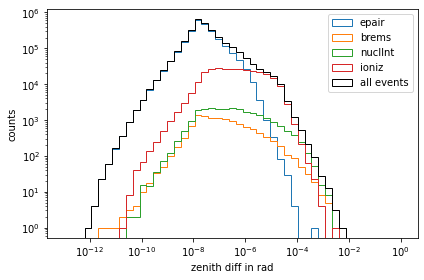

In [5]:
types_reverse = {
            '-1': 'track length too short',
            '0': 'cont',
            '1': 'epair',
            '2': 'brems',
            '3': 'nuclInt',
            '4': 'ioniz',
            '5': 'decay'
    }

stoch_defl = data_along_track_01['along_defl_stoch']
stoch_types = data_along_track_01['along_defl_type'][(data_along_track_01['along_defl_type']!=0)]
bins = np.logspace(-13, 0, 50)
for i,typ in enumerate(tqdm(np.unique(stoch_types))):
    plt.hist(np.deg2rad(stoch_defl[stoch_types==typ]), \
             bins=bins, histtype='step', label=types_reverse[str(typ)])
plt.hist(np.deg2rad(data_along_track_01['along_defl_stoch']), color='black', histtype='step', bins=bins, label='all events')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('zenith diff in rad')
plt.ylabel('counts')
plt.legend()
plt.tight_layout()
# if save_plot:
    
    # plt.savefig(plot_dir + '1PeV_10TeV_defl_zenith_rad_diff_for_eacht_type_{}events_{}.pdf'.format(n_events, param_name)) 

6.254269844201323052e-07


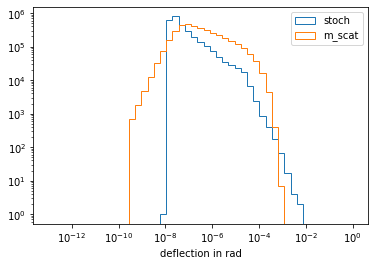

In [6]:
angles_stoch = data_along_track_01['along_defl_angle_stoch']
angles_cont = data_along_track_01['along_defl_angle_cont']
plt.hist(np.deg2rad(angles_stoch), bins=bins, histtype='step', label='stoch')
plt.hist(np.deg2rad(angles_cont), bins=bins, histtype='step', label='m_scat')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')
plt.legend()
print(np.min(angles_stoch[angles_stoch!=0]))